# Chapter 5, Example 5a
## Implementing dropouts

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import tensorflow.keras.datasets.mnist as mnist

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 128
num_classes = 10
no_epochs = 20

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [4]:
def valid_callback(name):
    return [tf.keras.callbacks.EarlyStopping(monitor='val_ce', patience=10),
           tfdocs.modeling.EpochDots()]

In [5]:
def compile_and_fit(model, name, max_epochs=1000):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.losses.CategoricalCrossentropy(name='ce'),'accuracy'])
    
    history = model.fit(train_x, train_y, 
                        epochs=max_epochs, 
                        batch_size = batch_size,
                        callbacks=valid_callback(name), 
                        validation_data=(test_x,test_y))
    
    return history

histories={}

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(625, activation='relu'),
    Dense(500, activation='relu'),
    Dense(10, activation='softmax')
])

histories['model'] = compile_and_fit(model, 'model')

Epoch 1/1000
469/469 [==============================] - 6s 11ms/step - loss: 0.2105 - ce: 0.2104 - accuracy: 0.9376 - val_loss: 0.1054 - val_ce: 0.1043 - val_accuracy: 0.9661

Epoch: 0, accuracy:0.9376,  ce:0.2104,  loss:0.2105,  val_accuracy:0.9661,  val_ce:0.1043,  val_loss:0.1054,  
.Epoch 2/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.0780 - ce: 0.0780 - accuracy: 0.9761 - val_loss: 0.0846 - val_ce: 0.0836 - val_accuracy: 0.9723
.Epoch 3/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.0484 - ce: 0.0484 - accuracy: 0.9848 - val_loss: 0.0762 - val_ce: 0.0754 - val_accuracy: 0.9769
.Epoch 4/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.0332 - ce: 0.0332 - accuracy: 0.9887 - val_loss: 0.0737 - val_ce: 0.0729 - val_accuracy: 0.9779
.Epoch 5/1000
469/469 [==============================] - 5s 10ms/step - loss: 0.0261 - ce: 0.0261 - accuracy: 0.9916 - val_loss: 0.0741 - val_ce: 0.0733 - val_accuracy: 0.9791
.Epoch 6/

In [7]:
regularized_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(625, activation='relu'),
    Dropout(0.5),
    Dense(500, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

histories['dropout'] = compile_and_fit(regularized_model, 'dropout')

Epoch 1/1000
469/469 [==============================] - 6s 11ms/step - loss: 0.3348 - ce: 0.3348 - accuracy: 0.8967 - val_loss: 0.1163 - val_ce: 0.1151 - val_accuracy: 0.9643

Epoch: 0, accuracy:0.8967,  ce:0.3348,  loss:0.3348,  val_accuracy:0.9643,  val_ce:0.1151,  val_loss:0.1163,  
.Epoch 2/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.1570 - ce: 0.1570 - accuracy: 0.9517 - val_loss: 0.0907 - val_ce: 0.0897 - val_accuracy: 0.9724
.Epoch 3/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.1250 - ce: 0.1250 - accuracy: 0.9618 - val_loss: 0.0790 - val_ce: 0.0782 - val_accuracy: 0.9764
.Epoch 4/1000
469/469 [==============================] - 5s 10ms/step - loss: 0.1033 - ce: 0.1033 - accuracy: 0.9683 - val_loss: 0.0750 - val_ce: 0.0742 - val_accuracy: 0.9760
.Epoch 5/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.0906 - ce: 0.0905 - accuracy: 0.9714 - val_loss: 0.0718 - val_ce: 0.0710 - val_accuracy: 0.9784
.Epoch 6/

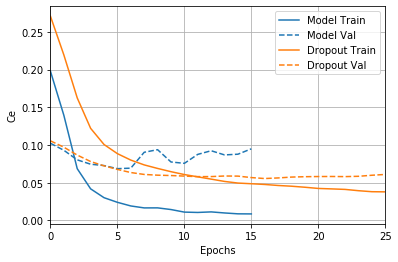

In [8]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'ce', smoothing_std=10)
plotter.plot(histories)

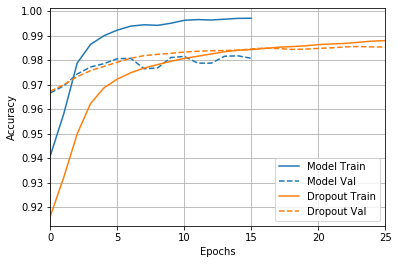

In [9]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)